In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import pandas as pd
import matplotlib.pyplot as plt

In [10]:
#load training data

train_set = torchvision.datasets.MNIST(
    root='./Data',
    train=True,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()])
)


In [11]:
#defining model sstructure

class Network(nn.Module):
    
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding = 1)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding =1)
        
        self.fc1 = nn.Linear(7 * 7 * 16, 128)
        self.fc2 = nn.Linear(128, 10)
        
        self.dropout = nn.Dropout(0.5)
        
    def forward(self, x):
        
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x,kernel_size=2, stride=2)
        
        
        x = x.view(-1, 7 * 7 * 16)
        
        x = self.fc1(x)
        x = F.relu(x)
        
        x = self.fc2(x)
        
        return x
    
net = Network()


 epoch: 0 total correct: 56771 cost: 101.90657008366543
Accuracy: 0.9461833333333334 


 epoch: 1 total correct: 58899 cost: 36.01060640123433
Accuracy: 0.98165 


 epoch: 2 total correct: 59106 cost: 29.03693664163984
Accuracy: 0.9851 


 epoch: 3 total correct: 59222 cost: 24.880023571447964
Accuracy: 0.9870333333333333 


 epoch: 4 total correct: 59234 cost: 23.714629508482176
Accuracy: 0.9872333333333333 


 epoch: 5 total correct: 59321 cost: 21.607815568328988
Accuracy: 0.9886833333333334 


 epoch: 6 total correct: 59403 cost: 20.049680449214577
Accuracy: 0.99005 


 epoch: 7 total correct: 59435 cost: 19.469102660995304
Accuracy: 0.9905833333333334 


 epoch: 8 total correct: 59423 cost: 19.942831760740773
Accuracy: 0.9903833333333333 


 epoch: 9 total correct: 59525 cost: 16.68995471475273
Accuracy: 0.9920833333333333 



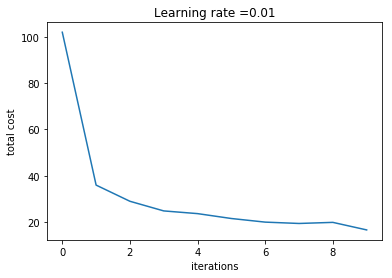

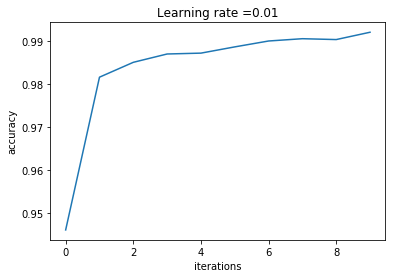

In [12]:
epoch = 0
Learning_rate =0.01 /(1 + 0.001* epoch)

#making training batches
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
#Using Adam potimizer
optimizer = optim.Adam(net.parameters(), lr=Learning_rate)
costs=[]
accuracies=[]

for epoch in range(10): #number of epoch
    
    total_cost = 0         #total cost of one full epoch
    total_correct = 0      #total correct predictions in one full epoch
    
    for batch in train_loader:
    
        images, labels = batch    #images is input, labels is the expected output
        
        #predicts output taking batch of images as input by using the model Network defined above 
        preds = net(images)       
        
        #calculates cost of individual batch
        cost = F.cross_entropy(preds,labels)
        
        
        #print('iter:',epoch,'batch:',batch_count,'cost:',cost)
        
        optimizer.zero_grad()    #empty the gradients
        cost.backward()          #calculates gradients
        optimizer.step()         #updates parameters
        
        #for calculating total cost in one epoch
        total_cost += cost.item()
        
        #for calculating total correct predictions in one epoch
        total_correct += preds.argmax(dim=1).eq(labels).sum().item()
        #print('\n\n pred',preds.argmax(dim =1),'label', labels)
        
    print('\n epoch:',epoch,'total correct:',total_correct,'cost:',total_cost)
    print('Accuracy:',total_correct/60000,'\n')
    costs.append(total_cost)
    accuracies.append(total_correct/60000)
    
#plotting the cost and accuracies

plt.plot(costs)
plt.ylabel('total cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(Learning_rate))
plt.show()

plt.plot(accuracies)
plt.ylabel('accuracy')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(Learning_rate))
plt.show()

In [13]:
#use this to save the model and its parameters a file
#ignore warning, if any

torch.save(net,'./trained_mnist_model_CNN.pth' )


In [14]:
#load test set
test_set = torchvision.datasets.MNIST(
    root='./Data',
    train=False,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()])
)


In [15]:
#load the learned model
net_test = torch.load('trained_mnist_model_CNN.pth')
net_test.eval()

Network(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5)
)

In [16]:
#load a batch of test cases
test_loader = torch.utils.data.DataLoader(test_set, batch_size=100)
total_correct = 0

for batch in test_loader:   #iterating over batches
    
    images, labels = batch
    
    preds = net_test(images.float())
    total_correct += preds.argmax(dim=1).eq(labels).sum().item()

print('Accuracy:',total_correct/10000,'\n')




Accuracy: 0.9851 

